## Project 1 :- Vaccination data
## Problem statement:- To find wheter the person is vaccinated or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\OM KHARODE\Datasets-main\h1n1_vaccine_prediction.csv")

In [3]:
df.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [4]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [5]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [4]:
df.shape

(26707, 34)

In [5]:
#droping unique_id because it is not required
df.drop(['unique_id'], inplace = True, axis = 1)

In [6]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [7]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

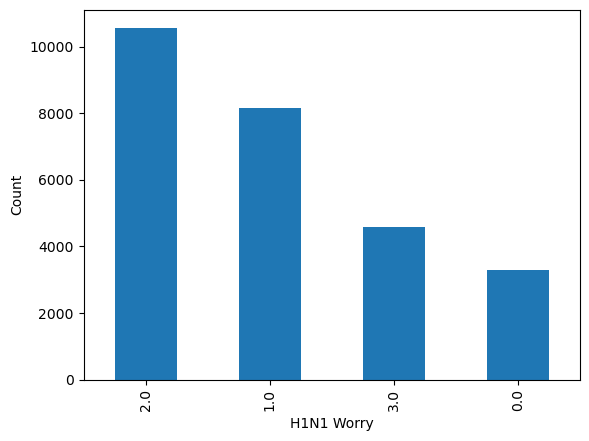

In [8]:
df['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

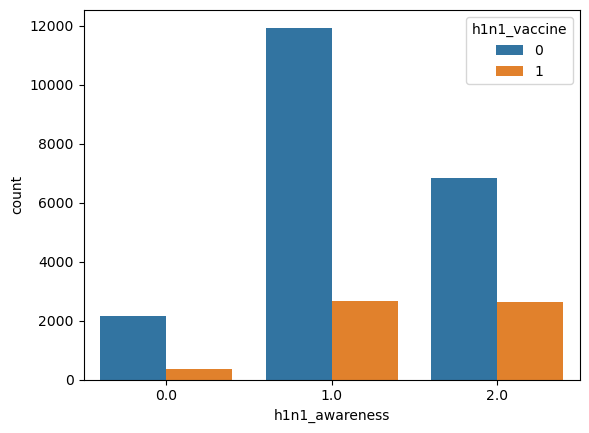

In [9]:
sns.countplot(x = 'h1n1_awareness', data = df, hue = 'h1n1_vaccine')
plt.show()

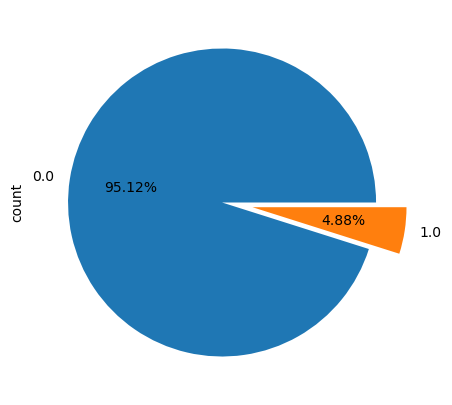

In [10]:
df['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()
#0=no, 1=yes

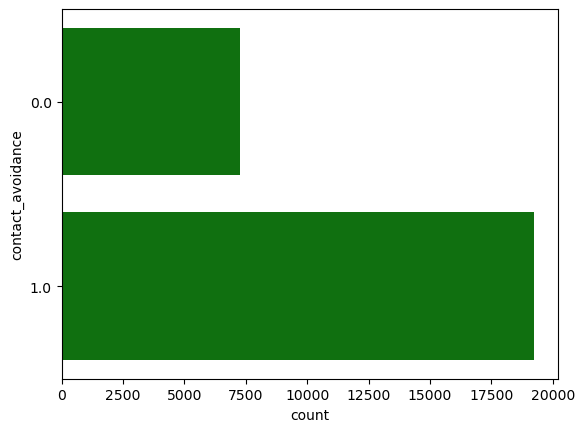

In [11]:
sns.countplot(y = 'contact_avoidance', data = df, color = 'green')
plt.show()

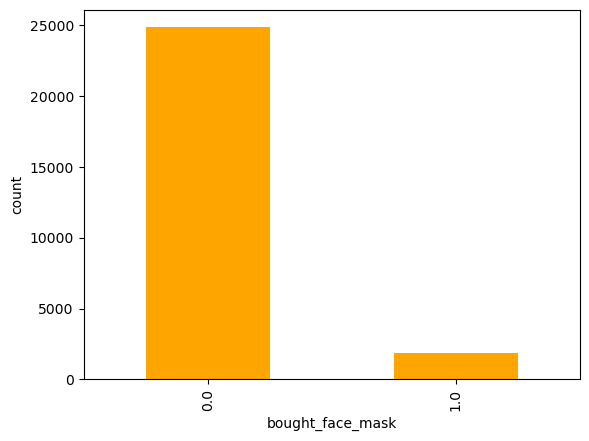

In [12]:
df['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

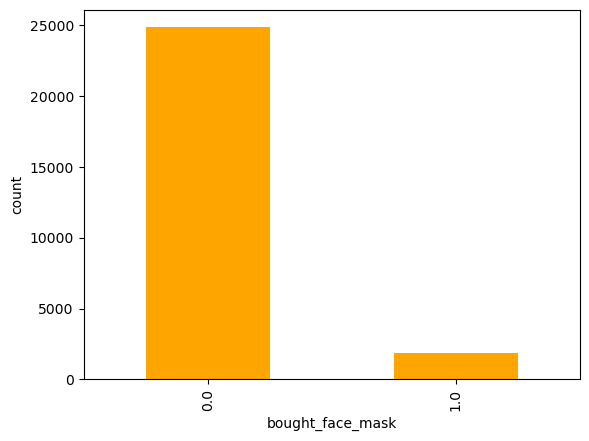

In [14]:
df['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

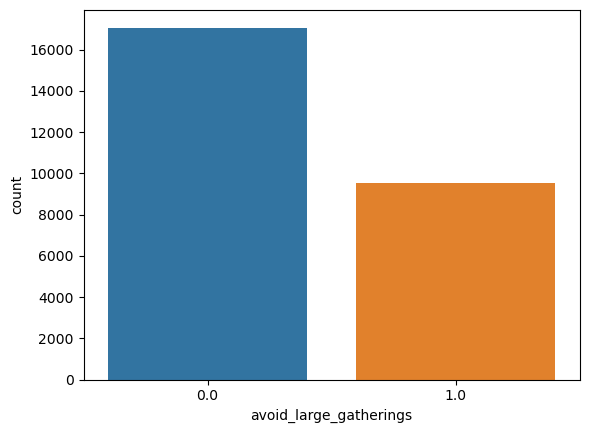

In [15]:
sns.countplot(x = 'avoid_large_gatherings', data =df)
plt.show()

<Axes: xlabel='sex', ylabel='count'>

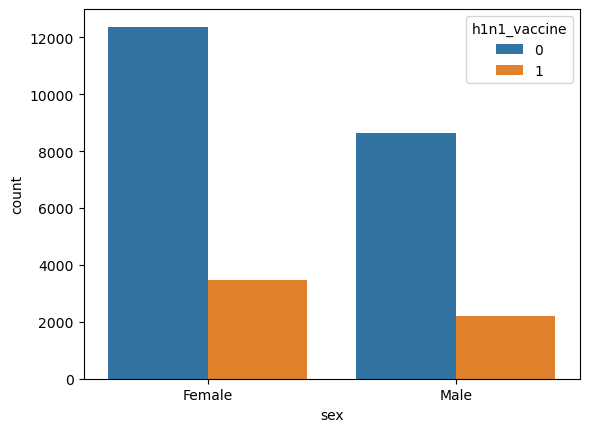

In [16]:
sns.countplot(x="sex", hue="h1n1_vaccine",data=df)

<Axes: xlabel='wash_hands_frequently', ylabel='count'>

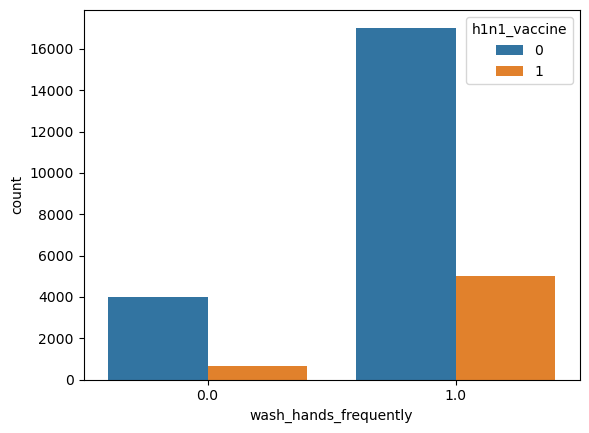

In [17]:
sns.countplot(x="wash_hands_frequently", hue="h1n1_vaccine",data=df)

In [18]:
display(df['no_of_adults'].unique(), df['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

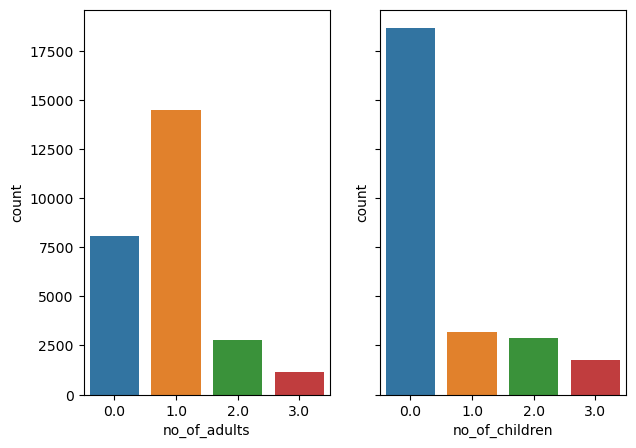

In [20]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = df, ax = ax[0])
sns.countplot( x = 'no_of_children', data = df, ax = ax[1])
plt.show()

In [23]:
# Categorical columns
categorical_columns = ['age_bracket', 'qualification', 'race', 'sex','income_level','housing_status', 'marital_status', 'employment', 'census_msa']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [24]:
# Numerical columns
numerical_columns = ['h1n1_worry','h1n1_vaccine', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc', 'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur','is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults', 'no_of_children']

for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)

In [25]:
# Ordinal columns
ordinal_columns = ['h1n1_vaccine']

for column in ordinal_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [26]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [28]:
df["age_bracket"] = le.fit_transform(df["age_bracket"])
df["qualification"] = le.fit_transform(df["qualification"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])

In [29]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,3,0,2,1,0,1,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,3,1,2,1,1,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.220312,...,3,1,0,1,0,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,3,0,2,1,1,1,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,3,0,0,0,0,0,0,1.0,0.0,0


In [32]:
y=df['h1n1_vaccine']
x=df.drop(['h1n1_vaccine'], axis=1)

In [33]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [34]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8390913629555666
Testing Score : 0.8270181219110379


## Model evaluation

In [35]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [36]:
from sklearn import metrics
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,14986,818
Act_1,2405,1821


In [37]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15804
           1       0.69      0.43      0.53      4226

    accuracy                           0.84     20030
   macro avg       0.78      0.69      0.72     20030
weighted avg       0.83      0.84      0.82     20030



In [38]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.964189,0.035811
1,0.981212,0.018788
2,0.668714,0.331286
3,0.977085,0.022915
4,0.932071,0.067929
...,...,...
20025,0.978795,0.021205
20026,0.895711,0.104289
20027,0.760364,0.239636
20028,0.837826,0.162174


In [39]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,Actual_Default,Prob_Default
9353,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,1,0,0,0,1,0,1.0,0.0,0,0.035811
6317,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.220312,...,0,0,1,1,0,1,1.0,0.0,0,0.018788
13542,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,0,0,1,0,0,2,0.0,0.0,0,0.331286
23986,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,0,2,1,0,1,0,0.0,0.0,0,0.022915
16025,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.000000,...,0,0,1,1,0,1,1.0,0.0,1,0.067929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0,0,0,1,0,2,3.0,1.0,0,0.021205
2481,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,0,0,1,1,1,0,0.0,0.0,0,0.104289
4047,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.000000,...,1,0,0,0,0,2,1.0,2.0,0,0.239636
6432,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,...,0,0,0,0,0,1,1.0,1.0,1,0.162174


In [40]:
# Decile Analysis
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    ret

In [41]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0)

In [42]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,12851,2953
Act_1,1220,3006


In [43]:
print(metrics.classification_report(y_train , newtrain_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     15804
           1       0.50      0.71      0.59      4226

    accuracy                           0.79     20030
   macro avg       0.71      0.76      0.73     20030
weighted avg       0.83      0.79      0.80     20030



In [44]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0)

In [45]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,4245,984
Act_1,469,979


In [46]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5229
           1       0.50      0.68      0.57      1448

    accuracy                           0.78      6677
   macro avg       0.70      0.74      0.71      6677
weighted avg       0.81      0.78      0.79      6677



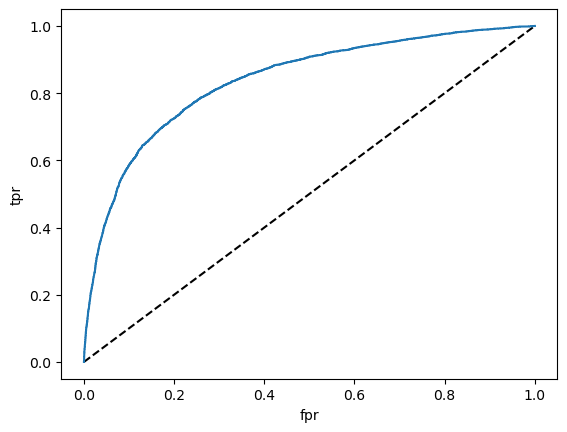

In [47]:
# Receiver Operating Characterestics 

probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [48]:
metrics.roc_auc_score(y_train,probs)

0.8375097757515365

In [50]:
import pandas as pd
from sklearn import metrics

# Assuming y_test and newtest_pred are defined elsewhere in your code
model_report = pd.DataFrame({
    'Model': ["Logical Regression"],
    'ROC Score': [metrics.roc_auc_score(y_test, newtest_pred)],
    'Precision Score': [metrics.precision_score(y_test, newtest_pred)],
    'Recall Score': [metrics.recall_score(y_test, newtest_pred)],
    'F1 Score': [metrics.f1_score(y_test, newtest_pred)],
    'Accuracy Score': [metrics.accuracy_score(y_test, newtest_pred)]
})

print(model_report)


                Model  ROC Score  Precision Score  Recall Score  F1 Score  \
0  Logical Regression   0.743962         0.498726      0.676105  0.574025   

   Accuracy Score  
0        0.782387  


In [51]:
from sklearn.tree import  DecisionTreeClassifier

DT_model =  DecisionTreeClassifier()
DT_model.fit(x_train, y_train)
print(f"Training Score : {DT_model.score(x_train, y_train)}")
print(f"Testing Score : {DT_model.score(x_test, y_test)}")

Training Score : 1.0
Testing Score : 0.769956567320653


In [52]:
pred_train=DT_model.predict(x_train)
pred_test=DT_model.predict(x_test)

In [53]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15804,0
Act_1,0,4226


In [54]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15804
           1       1.00      1.00      1.00      4226

    accuracy                           1.00     20030
   macro avg       1.00      1.00      1.00     20030
weighted avg       1.00      1.00      1.00     20030



In [55]:
pd.DataFrame(DT_model.predict_proba(x_train), columns=["Prob_0", "Prob_1"])


,Prob_0,Prob_1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
20025,1.0,0.0
20026,1.0,0.0
20027,1.0,0.0
20028,0.0,1.0


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(x_train, y_train)

In [57]:
pred_train=gbcl.predict(x_train)
pred_test=gbcl.predict(x_test)

In [65]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15804,0
Act_1,0,4226


In [66]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15804
           1       1.00      1.00      1.00      4226

    accuracy                           1.00     20030
   macro avg       1.00      1.00      1.00     20030
weighted avg       1.00      1.00      1.00     20030



In [67]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 2500, random_state=0,max_features=3)
rfcl = rfcl.fit(x_train, y_train)

In [68]:
pred_train=rfcl.predict(x_train)
pred_test=rfcl.predict(x_test)

In [69]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15804,0
Act_1,0,4226


In [64]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15804
           1       1.00      1.00      1.00      4226

    accuracy                           1.00     20030
   macro avg       1.00      1.00      1.00     20030
weighted avg       1.00      1.00      1.00     20030

